# Visualisation des prévisions (sur les Départs)

In [1]:
import pandas as pd
import numpy as np

from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
database_7j = pd.read_csv("Previsions_7j.csv",low_memory=False,decimal=',')
database_7j = database_7j.astype({'Date': 'datetime64[ns]','PAX':'float','PAX_NP':'float','IC95_low_NP':'float','IC95_up_NP':'float',
                          'PAX_ARIMA':'float','IC95_low_ARIMA':'float','IC95_up_ARIMA':'float',
                          'PAX_SARIMA':'float','IC95_low_SARIMA':'float','IC95_up_SARIMA':'float',
                          'PAX_Lasso':'float', 'IC95_low_LASSO' :'float', 'IC95_up_LASSO':'float', 'PAX_FQM':'float'})

In [3]:
database_91j = pd.read_csv("Previsions_91j.csv",low_memory=False,decimal=',')
database_91j = database_91j.astype({'Date': 'datetime64[ns]','PAX':'float','PAX_NP':'float','IC95_low_NP':'float','IC95_up_NP':'float',
                          'PAX_ARIMA':'float','IC95_low_ARIMA':'float','IC95_up_ARIMA':'float',
                          'PAX_SARIMA':'float','IC95_low_SARIMA':'float','IC95_up_SARIMA':'float',
                          'PAX_Lasso':'float', 'IC95_low_LASSO' :'float', 'IC95_up_LASSO':'float', 'PAX_FQM':'float'})

In [26]:
database_365j = pd.read_csv("Previsions_365j.csv",low_memory=False,decimal=',')
database_365j = database_365j.astype({'Date': 'datetime64[ns]','PAX':'float','PAX_NP':'float','IC95_low_NP':'float','IC95_up_NP':'float',
                          'PAX_ARIMA':'float','IC95_low_ARIMA':'float','IC95_up_ARIMA':'float',
                          'PAX_SARIMA':'float','IC95_low_SARIMA':'float','IC95_up_SARIMA':'float',
                          'PAX_Lasso':'float', 'IC95_low_LASSO' :'float', 'IC95_up_LASSO':'float','PAX_FQM':'float'})

In [27]:
faisceaux = ["National","Schengen","Dom Tom","Autre UE","International"]

dateDebPrev=pd.to_datetime("2016-01-01")

database_7j_depart = database_7j[database_7j['ArrDep'].isin(['Départ'])]
database_91j_depart = database_91j[database_91j['ArrDep'].isin(['Départ'])]
database_365j_depart = database_365j[database_365j['ArrDep'].isin(['Départ'])]

## Visualisation des prévisions individuelles sur 7 jours, avec leurs intervalles de confiance

In [6]:
prev_7j_depart = database_7j_depart[database_7j_depart['Date']>=dateDebPrev]

#Sélection d'un historique d'un mois :
histo_7j_depart = database_7j_depart[(database_7j_depart['Date']<dateDebPrev) & (database_7j_depart['Date']>= dateDebPrev - timedelta(days = 31))]

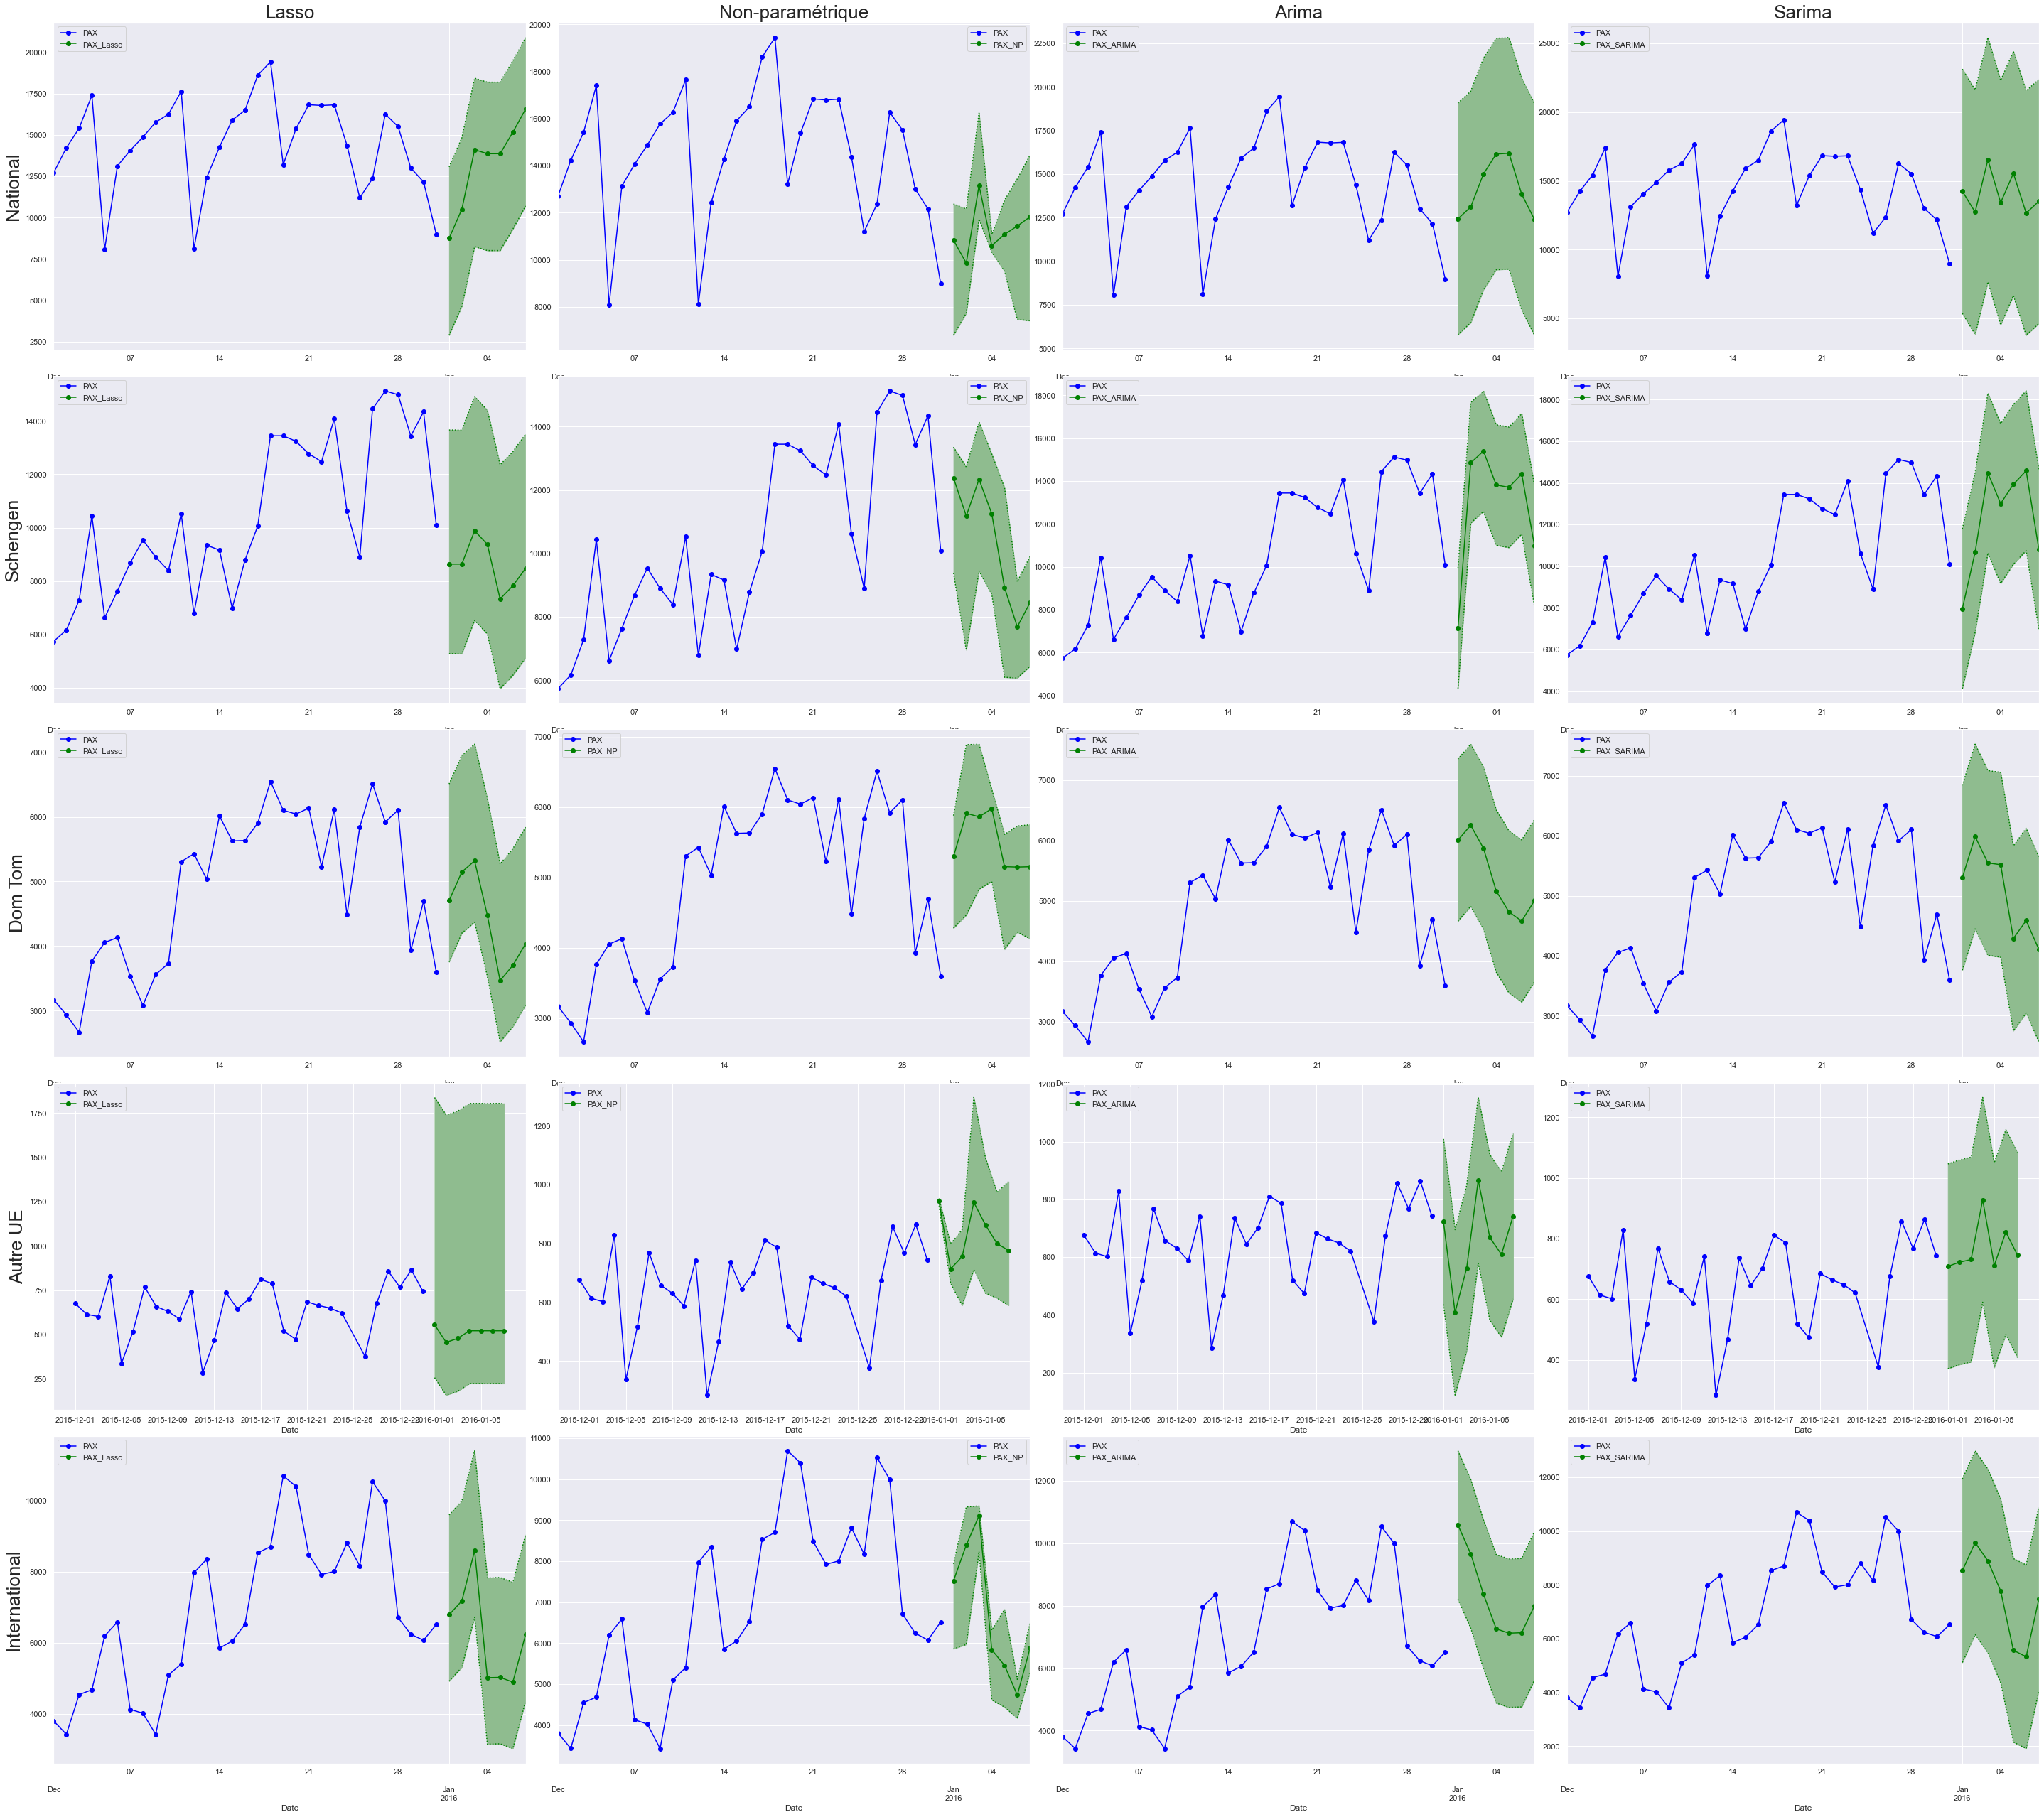

In [21]:
sns.set(style='darkgrid')

cols = ["Lasso", "Non-paramétrique","Arima","Sarima"]

fig, ax = plt.subplots(5,4, figsize=(40,35))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=26)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=26)

fig.tight_layout()


for i in range(5) :
    
    axi = ax[i,:]
    histo = histo_7j_depart[histo_7j_depart['Faisceau'].isin([faisceaux[i]])]
    prev = prev_7j_depart[prev_7j_depart['Faisceau'].isin([faisceaux[i]])]
    
    
    # Modele Lasso : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_Lasso']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='green',style='o-')
    
    ax[(i,0)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_LASSO']), y2=list(prev['IC95_low_LASSO']), color='darkseagreen', label='IC à 95%')

    prev[['Date','IC95_up_LASSO']].set_index('Date').plot(ax=ax[(i,0)],legend=False,subplots=True,color='green',style=':')
    prev[['Date','IC95_low_LASSO']].set_index('Date').plot(ax=ax[(i,0)],legend=False,subplots=True,color='green',style=':')

    
    # Modele NP :
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,1)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_NP']), y2=list(prev['IC95_low_NP']), color='darkseagreen', label='IC à 95%')

    prev[['Date','IC95_up_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    prev[['Date','IC95_low_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Arima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,2)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_ARIMA']), y2=list(prev['IC95_low_ARIMA']), color='darkseagreen', label='IC à 95%')

    prev[['Date','IC95_up_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    prev[['Date','IC95_low_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Sarima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,3)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_SARIMA']), y2=list(prev['IC95_low_SARIMA']), color='darkseagreen', label='IC à 95%')

    prev[['Date','IC95_up_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    prev[['Date','IC95_low_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    
    
plt.show()

## Comparaison des prévisions sur 7 jours


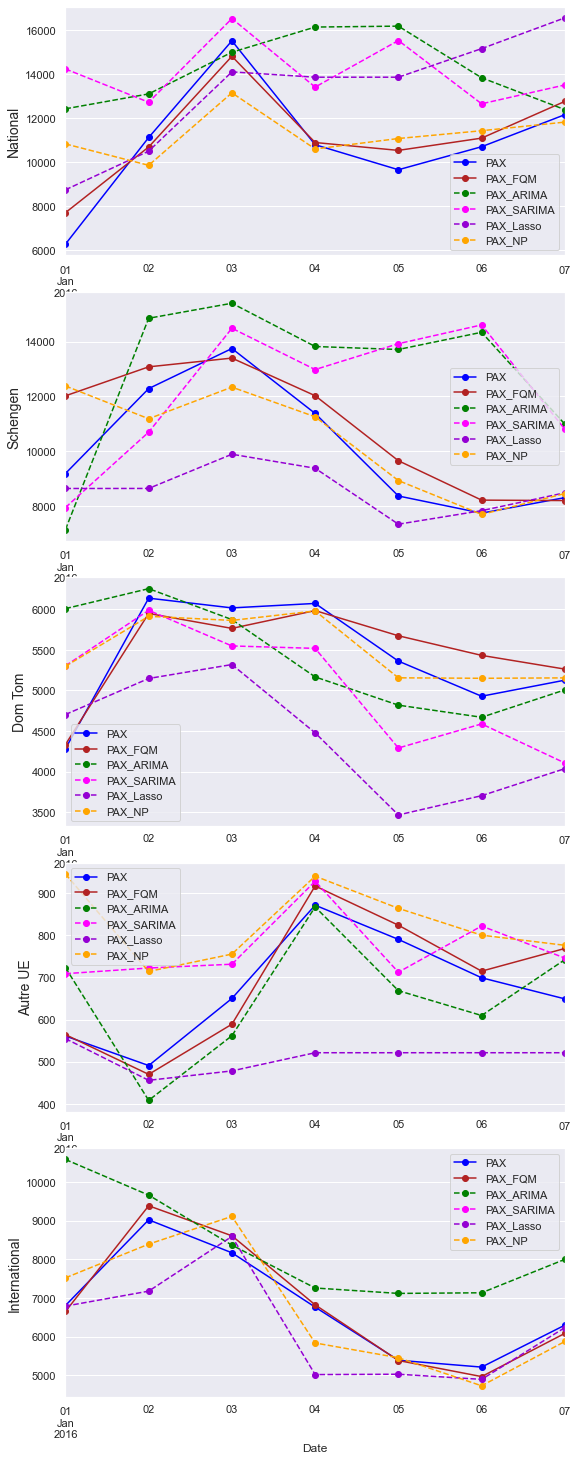

In [8]:
sns.set(style='darkgrid')


fig, ax = plt.subplots(5,1, figsize=(8,20))

for axi, row in zip(ax[:], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=14)

fig.tight_layout()

for i in range(5) :

    prev = prev_7j_depart[prev_7j_depart['Faisceau'].isin([faisceaux[i]])]
    

    prev[['Date','PAX']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='blue',style='o-')
    
    prev[['Date','PAX_FQM']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='firebrick',style='o-')
    
    prev[['Date','PAX_ARIMA']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='green',style='o--')
    prev[['Date','PAX_SARIMA']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='magenta',style='o--')
    prev[['Date','PAX_Lasso']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='darkviolet',style='o--')
    prev[['Date','PAX_NP']].set_index('Date').plot(ax=ax[i],legend=True,subplots=True,color='orange',style='o--')


plt.show()

## Visualisation des prévisions individuelles sur 3 mois, avec leurs intervalles de confiance

In [9]:
prev_91j_depart = database_91j_depart[database_91j_depart['Date']>=dateDebPrev]

#Sélection d'un historique de 3 mois :
histo_91j_depart = database_91j_depart[(database_91j_depart['Date']<dateDebPrev) & (database_91j_depart['Date']>= dateDebPrev - timedelta(days = 92))]

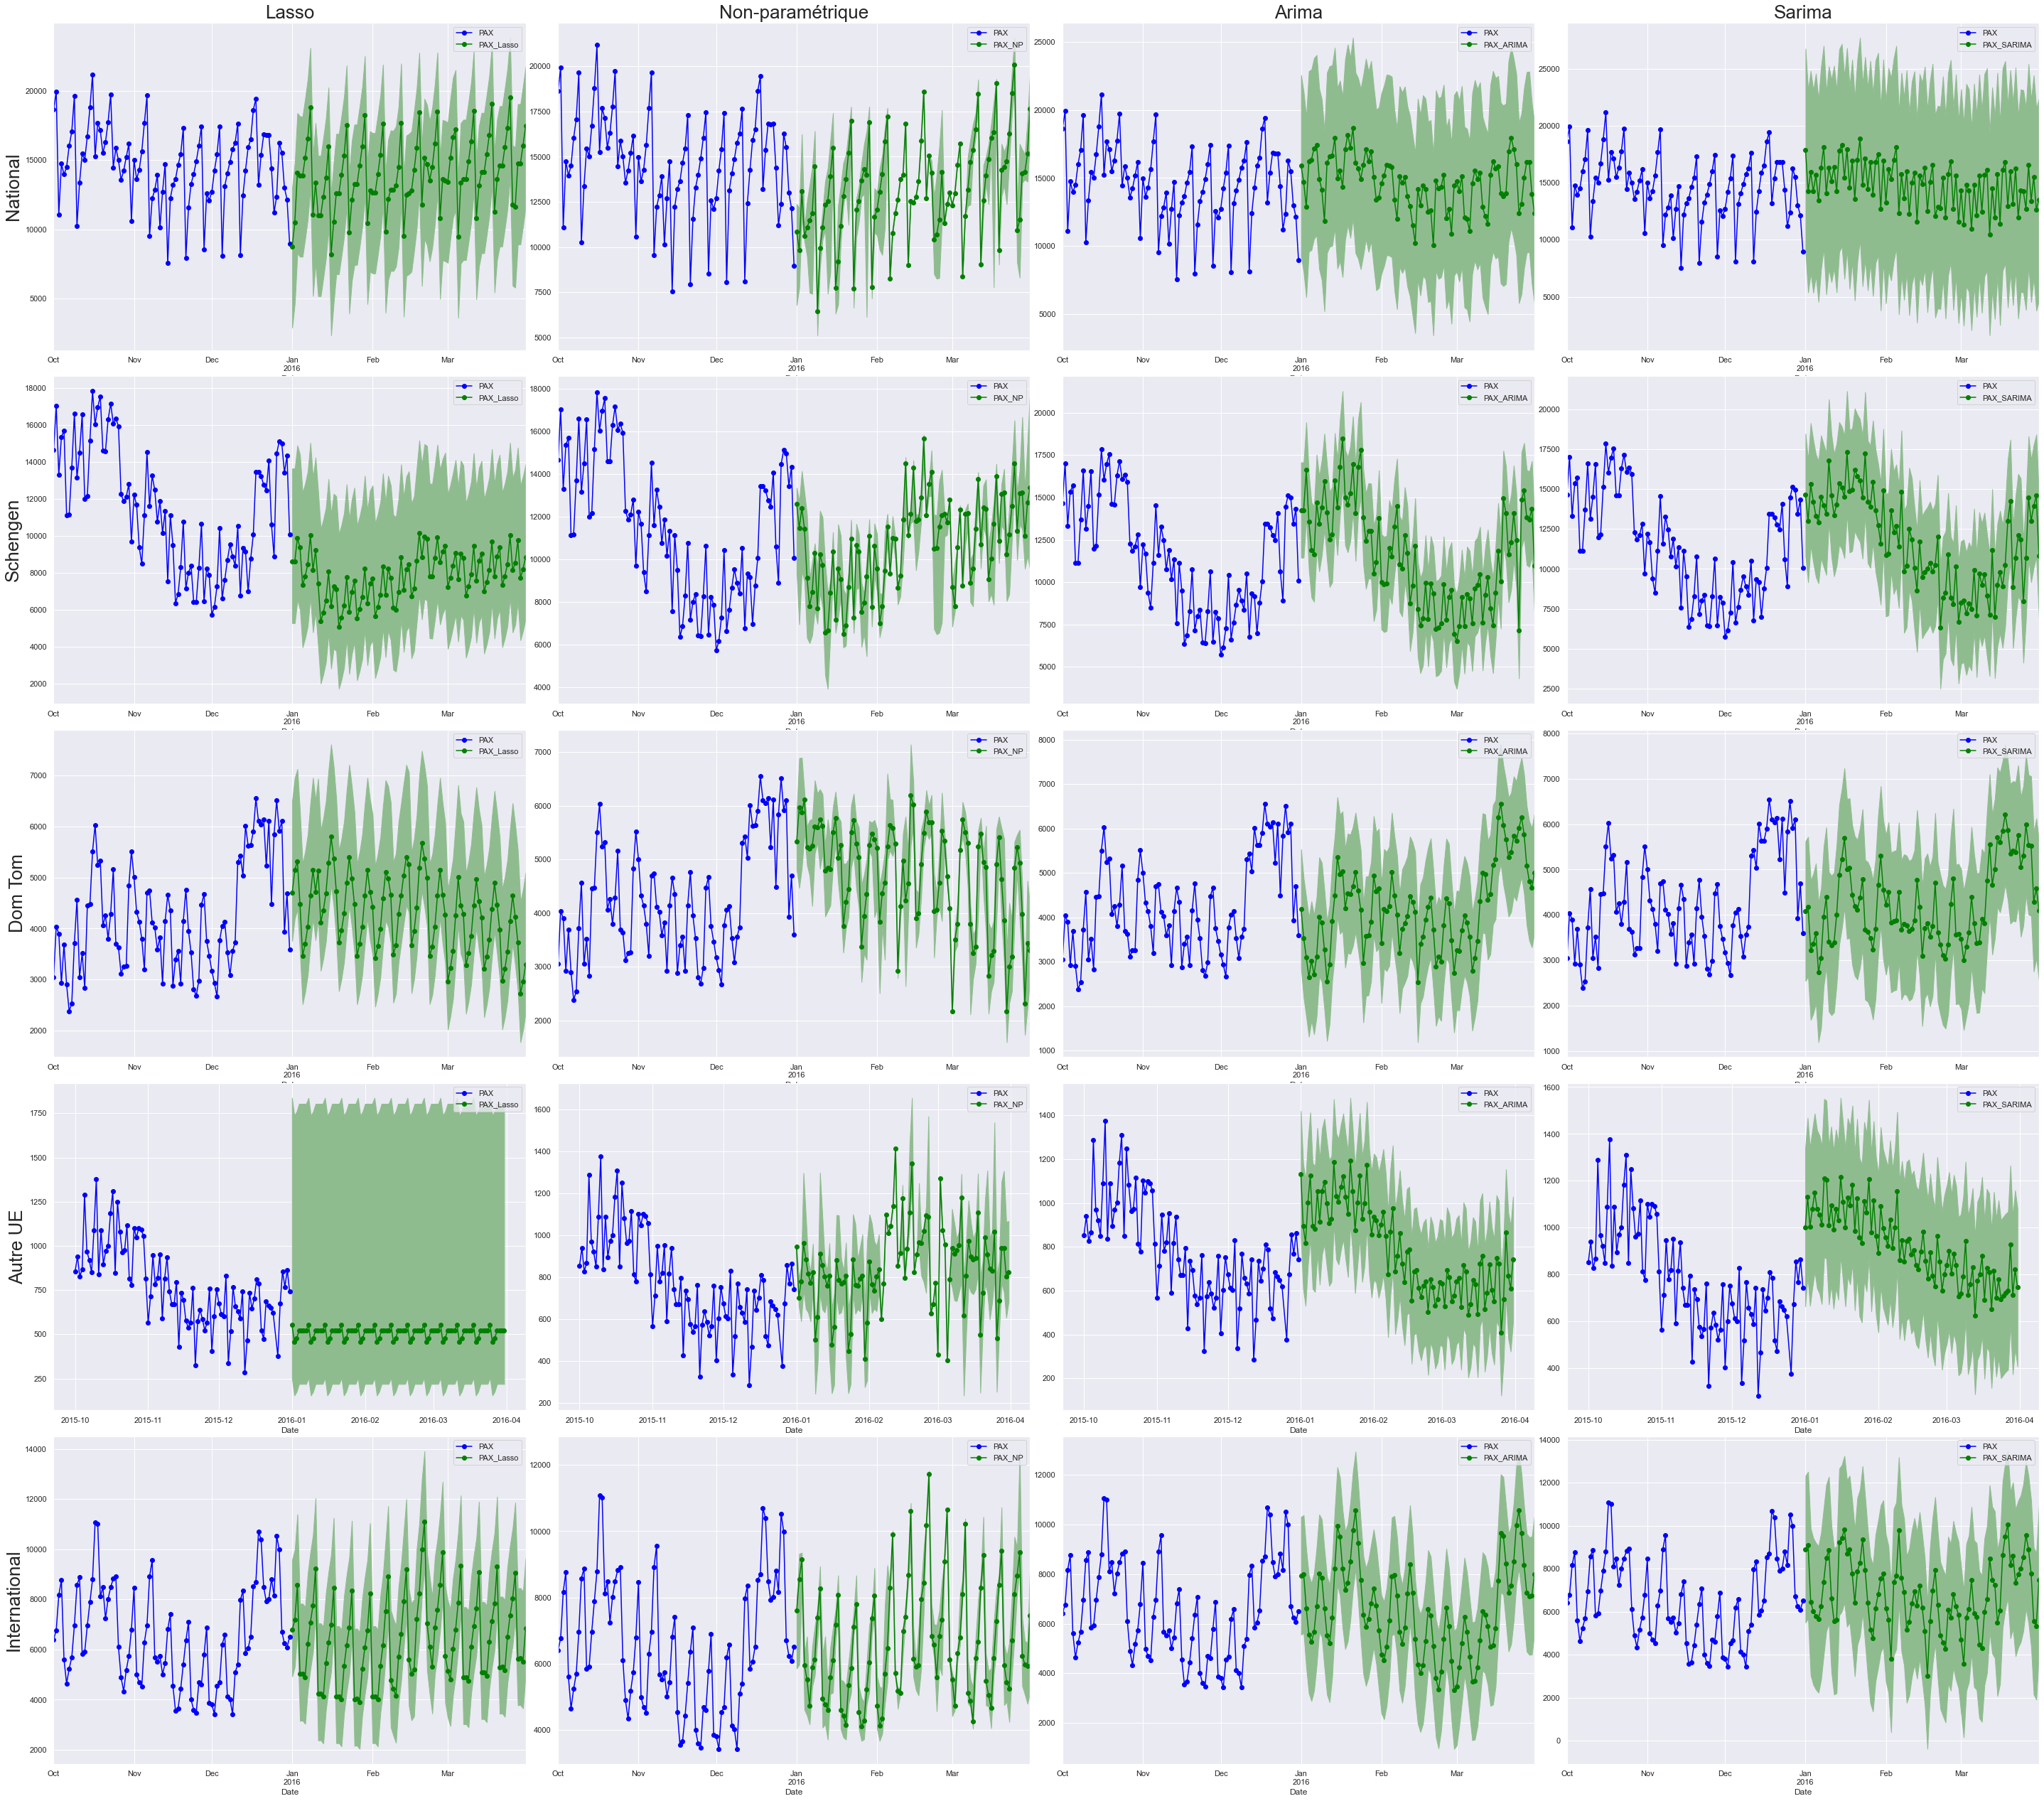

In [23]:
sns.set(style='darkgrid')

cols = ["Lasso", "Non-paramétrique","Arima","Sarima"]

fig, ax = plt.subplots(5,4, figsize=(40,35))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=26)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=26)

fig.tight_layout()


for i in range(5) :
    
    axi = ax[i,:]
    histo = histo_91j_depart[histo_91j_depart['Faisceau'].isin([faisceaux[i]])]
    prev = prev_91j_depart[prev_91j_depart['Faisceau'].isin([faisceaux[i]])]
    
    
    # Modele Lasso : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_Lasso']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='green',style='o-')
    
    ax[(i,0)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_LASSO']), y2=list(prev['IC95_low_LASSO']), color='darkseagreen', label='IC à 95%')
    
    # Modele NP :
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,1)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_NP']), y2=list(prev['IC95_low_NP']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Arima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,2)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_ARIMA']), y2=list(prev['IC95_low_ARIMA']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Sarima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='green',style='o-')

    ax[(i,3)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_SARIMA']), y2=list(prev['IC95_low_SARIMA']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    
    
plt.show()

## Visualisation des prédictions sur 1 an, agrégées par semaine

In [28]:
prev_365j_depart = database_365j_depart[database_365j_depart['Date']>=dateDebPrev]

#Sélection d'un historique de 3 ans :
histo_365j_depart = database_365j_depart[(database_365j_depart['Date']<dateDebPrev) & (database_365j_depart['Date']>= dateDebPrev - timedelta(days = 3*365))]

In [29]:
prev_365j_depart['Week'] = prev_365j_depart["Date"].dt.strftime('%Y%W')
histo_365j_depart['Week'] = histo_365j_depart["Date"].dt.strftime('%Y%W')

histo_365j_depart_agg = histo_365j_depart[['Week','PAX','Date','Faisceau']]
histo_365j_depart_agg = histo_365j_depart_agg.groupby(['Week','Faisceau']).agg({'PAX':'sum','Date':'min'}).reset_index()

prev_365j_depart_agg = prev_365j_depart[['Week','PAX','PAX_FQM','PAX_NP','PAX_ARIMA','PAX_SARIMA','PAX_Lasso','Date','Faisceau','IC95_low_LASSO','IC95_up_LASSO','IC95_low_NP','IC95_up_NP','IC95_low_SARIMA','IC95_up_SARIMA','IC95_low_ARIMA','IC95_up_ARIMA']]
prev_365j_depart_agg = prev_365j_depart_agg.groupby(['Week','Faisceau']).agg({'PAX':'sum','PAX_FQM':'sum','PAX_NP':'sum','PAX_ARIMA':'sum','PAX_SARIMA':'sum','PAX_Lasso':'sum','Date':'min','IC95_low_LASSO':'sum','IC95_up_LASSO':'sum','IC95_low_NP':'sum','IC95_up_NP':'sum','IC95_low_SARIMA':'sum','IC95_up_SARIMA':'sum','IC95_low_ARIMA':'sum','IC95_up_ARIMA':'sum'}).reset_index()

<ipython-input-29-bbf267864e1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev_365j_depart['Week'] = prev_365j_depart["Date"].dt.strftime('%Y%W')
<ipython-input-29-bbf267864e1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  histo_365j_depart['Week'] = histo_365j_depart["Date"].dt.strftime('%Y%W')


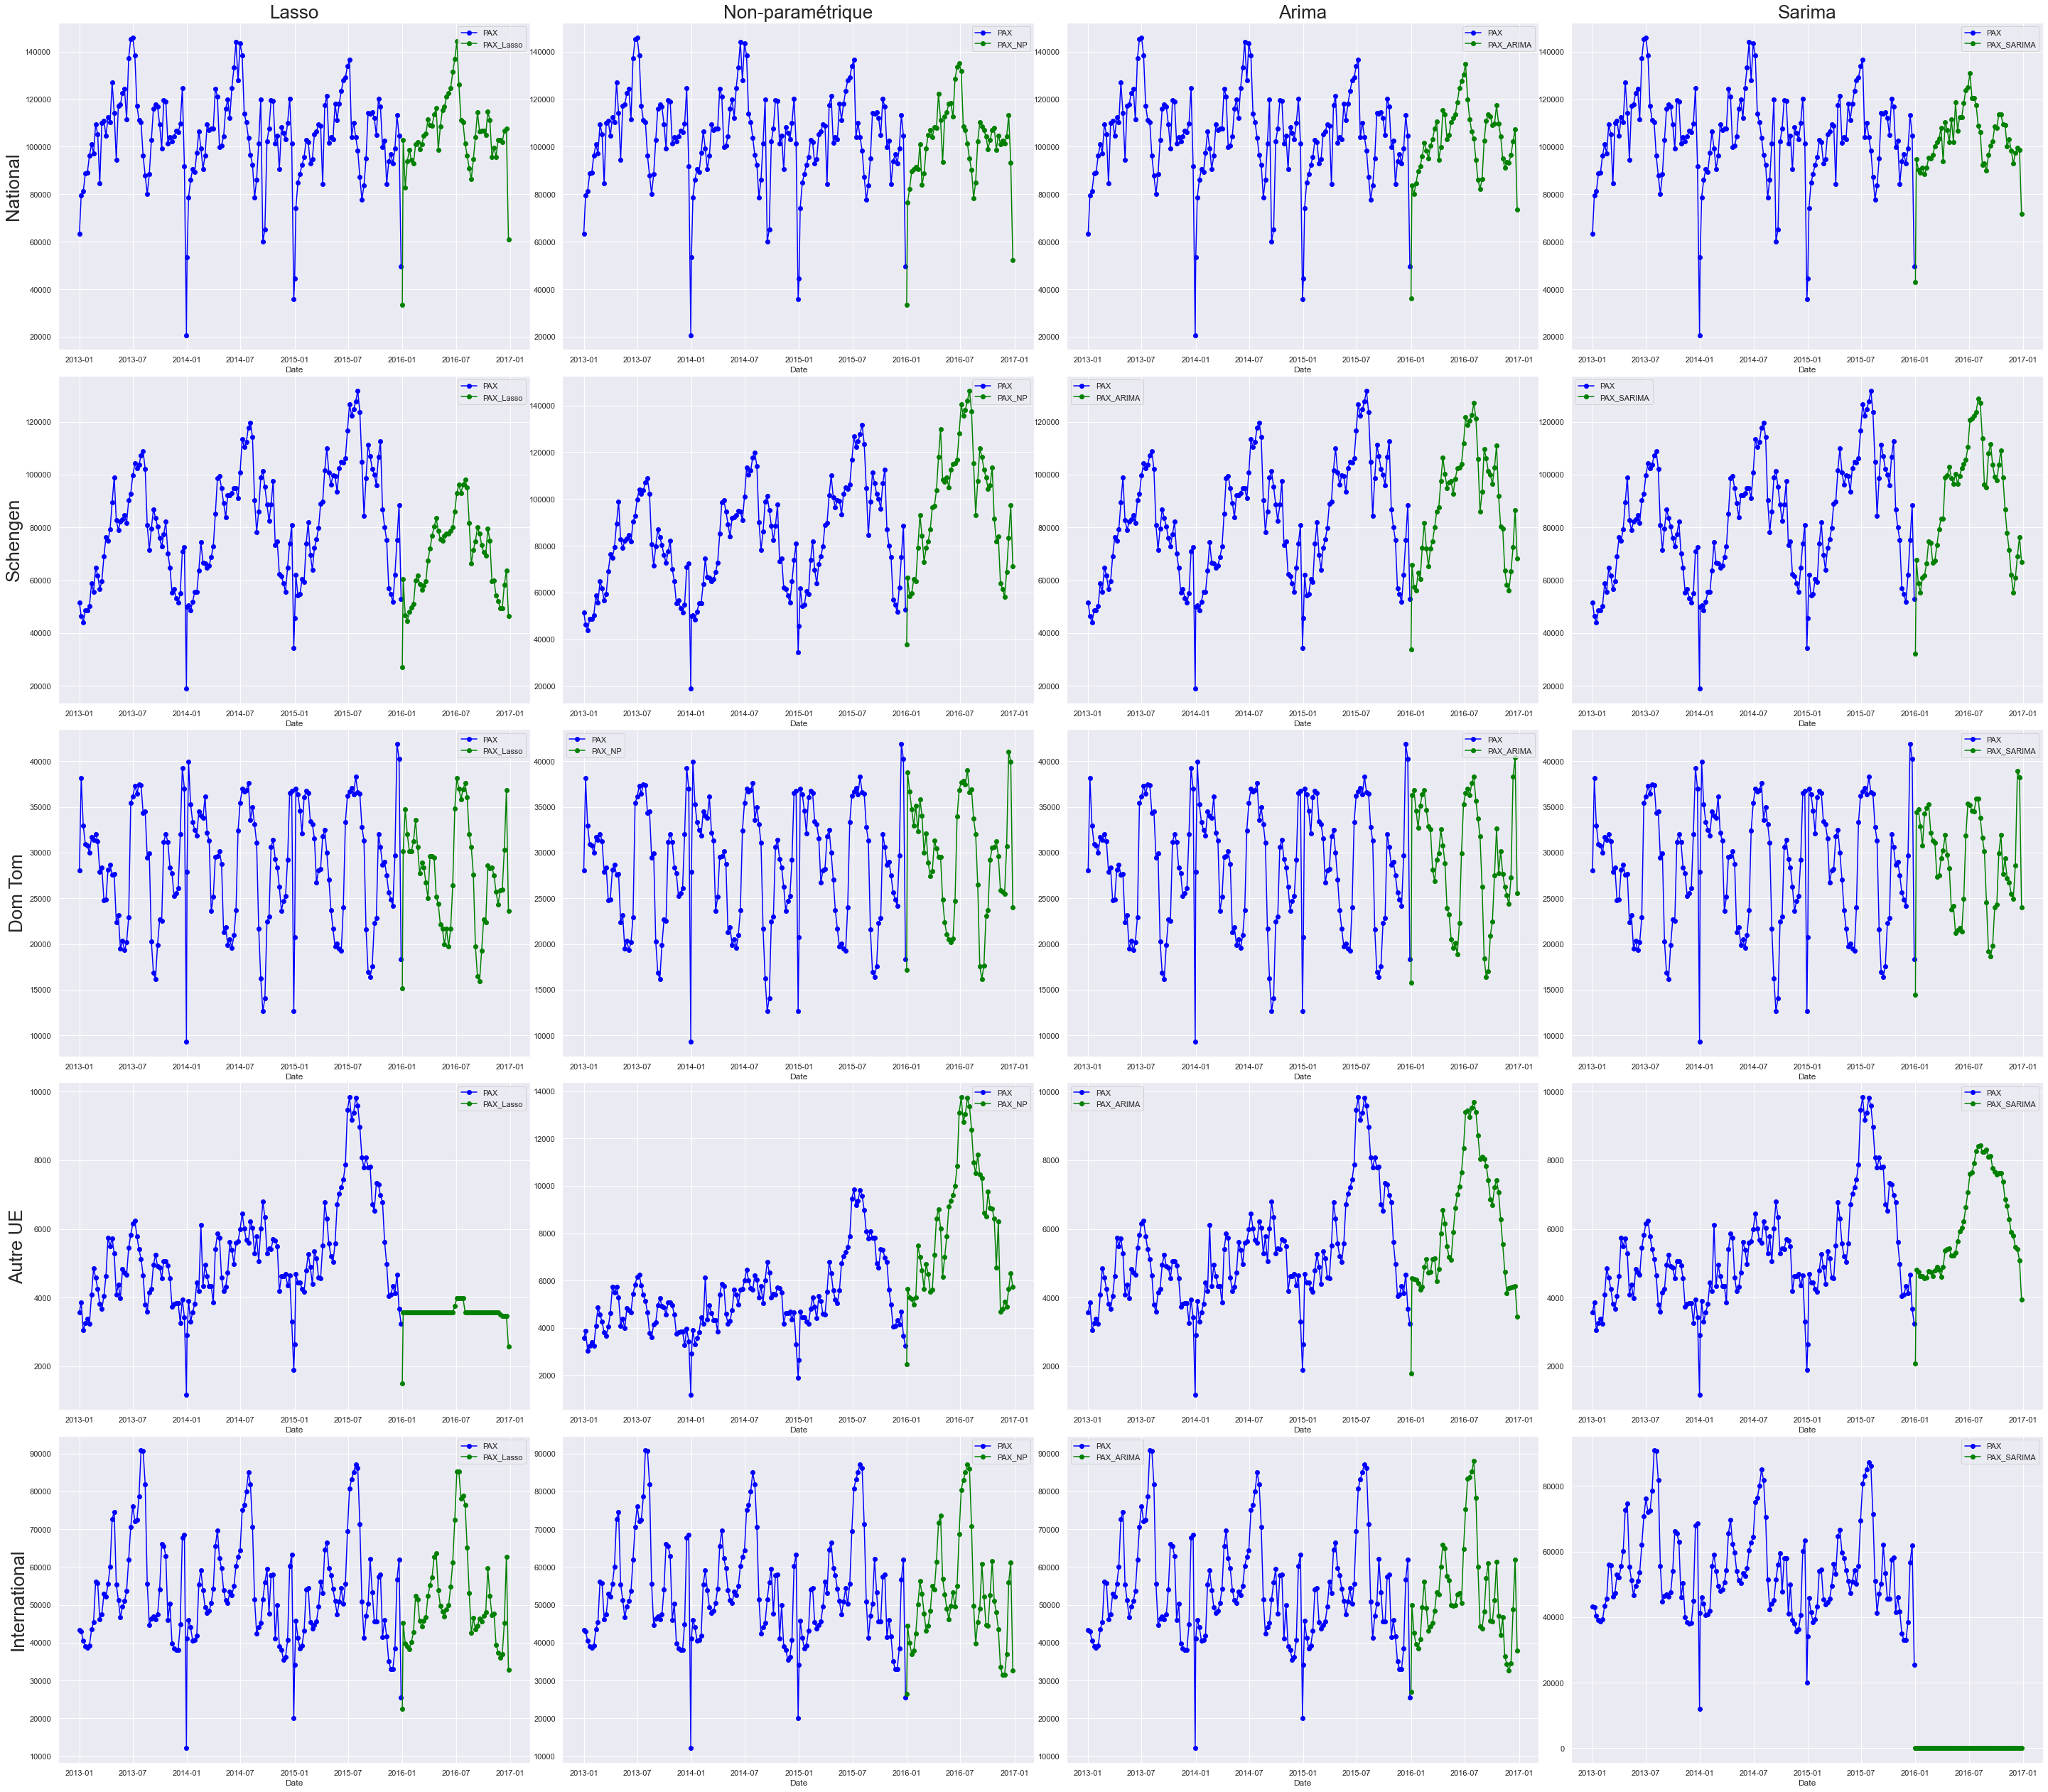

In [21]:
sns.set(style='darkgrid')

cols = ["Lasso", "Non-paramétrique","Arima","Sarima"]

fig, ax = plt.subplots(5,4, figsize=(40,35))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=26)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=26)

fig.tight_layout()


for i in range(5) :
    
    axi = ax[i,:]
    histo = histo_365j_depart_agg[histo_365j_depart_agg['Faisceau'].isin([faisceaux[i]])]
    prev = prev_365j_depart_agg[prev_365j_depart_agg['Faisceau'].isin([faisceaux[i]])]
    
    
    # Modele Lasso : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_Lasso']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='green',style='o-')

    
    # Modele NP :
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='green',style='o-')

    #ax[(i,1)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_NP']), y2=list(prev['IC95_low_NP']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_NP']].set_index('Date').plot(ax=ax[(i,1)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Arima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='green',style='o-')

    #ax[(i,2)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_ARIMA']), y2=list(prev['IC95_low_ARIMA']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_ARIMA']].set_index('Date').plot(ax=ax[(i,2)],legend=False,subplots=True,color='green',style=':')
    
    
    # Modele Sarima : 
    
    histo[['Date','PAX']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='blue',style='o-')
    prev[['Date','PAX_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=True,subplots=True,color='green',style='o-')

    #ax[(i,3)].fill_between(x=list(prev['Date']), y1=list(prev['IC95_up_SARIMA']), y2=list(prev['IC95_low_SARIMA']), color='darkseagreen', label='IC à 95%')

    #prev[['Date','IC95_up_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    #prev[['Date','IC95_low_SARIMA']].set_index('Date').plot(ax=ax[(i,3)],legend=False,subplots=True,color='green',style=':')
    
    
plt.show()

## Calcul d'indicateurs de performance (RMSE et MAPE)

In [26]:
# Calcul des performances (RMSE et MAPE) sur 7 jours
from math import sqrt 

modeles=['FQM','Lasso','NP','ARIMA','SARIMA']
performances_7j = pd.DataFrame(columns=['Faisceau','Modèle','RMSE_7j','MAPE_7j']) 

for i in range(5) :
    
    prev = prev_7j_depart[prev_7j_depart['Faisceau'].isin([faisceaux[i]])]
    
    for k in modeles :
        prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
        mape_k = prev['ape_'+k].mean()
        
        prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2
        rmse_k = sqrt(prev['se_'+k].mean())
        
        performances_7j = performances_7j.append({'Faisceau': faisceaux[i], 'Modèle' : k, 'RMSE_7j' : rmse_k, 'MAPE_7j' : mape_k}, ignore_index=True)


<ipython-input-26-52ec477ff1a7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
<ipython-input-26-52ec477ff1a7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2


In [28]:
# Calcul des performances (RMSE et MAPE) sur 91 jours
from math import sqrt 

modeles=['FQM','Lasso','NP','ARIMA','SARIMA']
performances_91j = pd.DataFrame(columns=['Faisceau','Modèle','RMSE_91j','MAPE_91j'])

for i in range(5) :
    
    prev = prev_91j_depart[prev_91j_depart['Faisceau'].isin([faisceaux[i]])]
    
    for k in modeles :
        prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
        mape_k = prev['ape_'+k].mean()
        
        prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2
        rmse_k = sqrt(prev['se_'+k].mean())
        
        performances_91j = performances_91j.append({'Faisceau': faisceaux[i], 'Modèle' : k, 'RMSE_91j' : rmse_k, 'MAPE_91j' : mape_k}, ignore_index=True)

<ipython-input-28-cdb965fe525f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
<ipython-input-28-cdb965fe525f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2


In [29]:
# Calcul des performances (RMSE et MAPE) sur 365 jours
from math import sqrt 

modeles=['FQM','NP','Lasso','ARIMA','SARIMA']
performances_365j = pd.DataFrame(columns=['Faisceau','Modèle','RMSE_365j','MAPE_365j'])

for i in range(5) :
    
    prev = prev_365j_depart[prev_365j_depart['Faisceau'].isin([faisceaux[i]])]
    
    for k in modeles :
        prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
        mape_k = prev['ape_'+k].mean()
        
        prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2
        rmse_k = sqrt(prev['se_'+k].mean())
        
        performances_365j = performances_365j.append({'Faisceau': faisceaux[i], 'Modèle' : k, 'RMSE_365j' : rmse_k, 'MAPE_365j' : mape_k}, ignore_index=True)


<ipython-input-29-727edf640354>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['ape_'+k] = abs(prev['PAX']-prev['PAX_'+k])/prev['PAX']
<ipython-input-29-727edf640354>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['se_'+k] = (prev['PAX']-prev['PAX_'+k])**2


### Visualisation 1 - graphiques par faisceaux

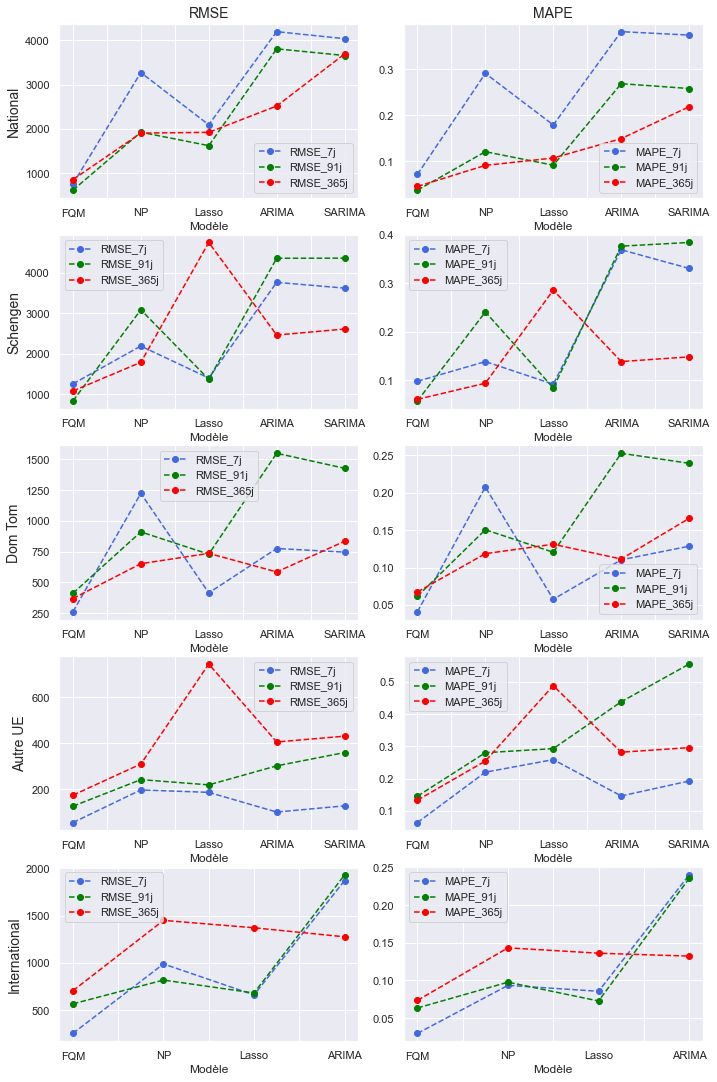

In [29]:
sns.set(style='darkgrid')

cols = ["RMSE","MAPE"]

fig, ax = plt.subplots(5,2, figsize=(10,15))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=14)

for axi, row in zip(ax[:,0], faisceaux):
    axi.set_ylabel(row, rotation=90,fontsize=14)

fig.tight_layout()


for i in range(5) :
    
    # Performances sur 7 jours :
    perf = performances_7j[performances_7j['Faisceau'].isin([faisceaux[i]])]

    perf[['Modèle','RMSE_7j']].set_index('Modèle').plot(ax = ax[(i,0)],subplots=True,color='royalblue',style='o--')
    perf[['Modèle','MAPE_7j']].set_index('Modèle').plot(ax = ax[(i,1)],subplots=True,color='royalblue',style='o--')
    
    
    # Performances sur 91 jours :
    perf = performances_91j[performances_91j['Faisceau'].isin([faisceaux[i]])]

    perf[['Modèle','RMSE_91j']].set_index('Modèle').plot(ax = ax[(i,0)],subplots=True,color='green',style='o--')
    perf[['Modèle','MAPE_91j']].set_index('Modèle').plot(ax = ax[(i,1)],subplots=True,color='green',style='o--')
    
    
    # Performances sur 365 jours :
    perf = performances_365j[performances_365j['Faisceau'].isin([faisceaux[i]])]

    perf[['Modèle','RMSE_365j']].set_index('Modèle').plot(ax = ax[(i,0)],subplots=True,color='red',style='o--')
    perf[['Modèle','MAPE_365j']].set_index('Modèle').plot(ax = ax[(i,1)],subplots=True,color='red',style='o--')


plt.show()

### Visualisation 2 - heatmap par horizon de prévision

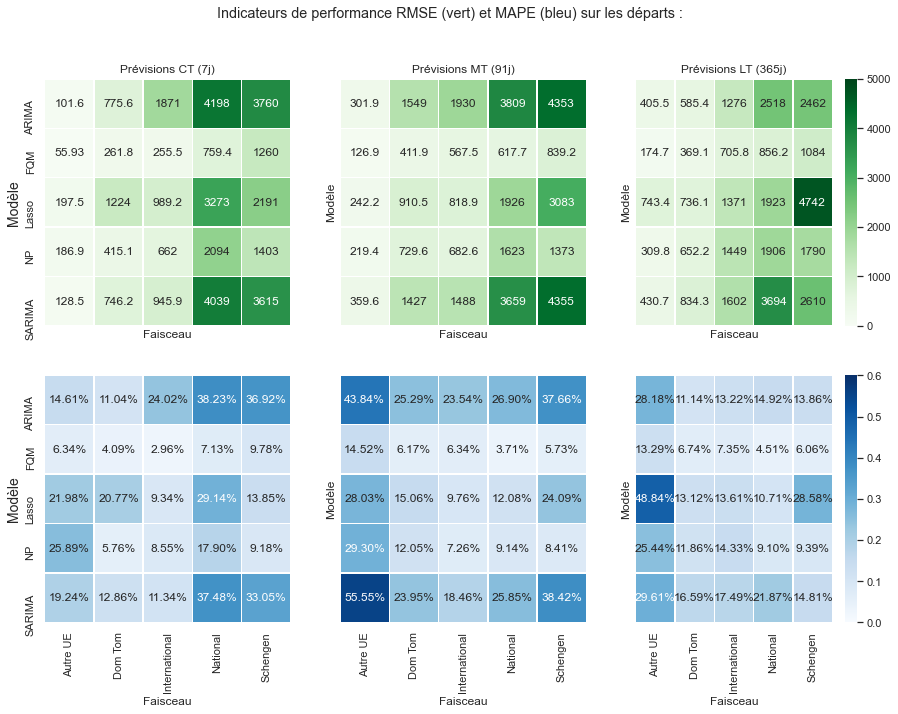

In [37]:
fig, ax = plt.subplots(2,3, figsize=(15,10), sharey=True, sharex=True)

for axi, col in zip(ax[0], ['Prévisions CT (7j)','Prévisions MT (91j)','Prévisions LT (365j)']):
    axi.set_title(col,fontsize=12)
    
for axi, row in zip(ax[:,0], ['RMSE', 'MAPE (en %)']):
    axi.set_ylabel(row, rotation=90,fontsize=14)

    
# Prévisions CT :

performances_7j_rmse = performances_7j.drop(columns=['MAPE_7j']).pivot("Modèle", "Faisceau", "RMSE_7j")
sns.heatmap(performances_7j_rmse, linewidths=.4, ax = ax[0,0],vmin=0, vmax=5000, cbar=False,cmap="Greens", annot=True,fmt='.4g')

performances_7j_mape = performances_7j.drop(columns=['RMSE_7j']).pivot("Modèle", "Faisceau", "MAPE_7j")
sns.heatmap(performances_7j_mape, linewidths=.4, ax = ax[1,0],vmin=0, vmax=0.6, cbar=False,cmap="Blues", annot=True,fmt=".2%")


# Prévisions MT :

performances_91j_rmse = performances_91j.drop(columns=['MAPE_91j']).pivot("Modèle", "Faisceau", "RMSE_91j")
sns.heatmap(performances_91j_rmse, linewidths=.4, ax = ax[0,1],vmin=0, vmax=5000, cbar=False,cmap="Greens", annot=True,fmt='.4g')

performances_91j_mape = performances_91j.drop(columns=['RMSE_91j']).pivot("Modèle", "Faisceau", "MAPE_91j")
sns.heatmap(performances_91j_mape, linewidths=.4, ax = ax[1,1],vmin=0, vmax=0.6, cbar=False,cmap="Blues", annot=True,fmt=".2%")

# Prévisions LT :

performances_365j_rmse = performances_365j.drop(columns=['MAPE_365j']).pivot("Modèle", "Faisceau", "RMSE_365j")
sns.heatmap(performances_365j_rmse, linewidths=.4, ax = ax[0,2],vmin=0, vmax=5000,cmap="Greens", annot=True,fmt='.4g')

performances_365j_mape = performances_365j.drop(columns=['RMSE_365j']).pivot("Modèle", "Faisceau", "MAPE_365j")
sns.heatmap(performances_365j_mape, linewidths=.4, ax = ax[1,2],vmin=0, vmax=0.6,cmap="Blues", annot=True,fmt=".2%")


plt.suptitle("Indicateurs de performance RMSE (vert) et MAPE (bleu) sur les départs :")
#fig.savefig('heatmap_rmse_mape.png')

# Visualisation des prévisions Schengen, par modèle

In [30]:
prev_7j_dep_sch = prev_7j_depart[prev_7j_depart['Faisceau'].isin(['Schengen'])]
prev_91j_dep_sch = prev_91j_depart[prev_91j_depart['Faisceau'].isin(['Schengen'])]
prev_365j_dep_sch = prev_365j_depart_agg[prev_365j_depart_agg['Faisceau'].isin(['Schengen'])]

histo_7j_dep_sch = histo_7j_depart[histo_7j_depart['Faisceau'].isin(['Schengen'])]
histo_91j_dep_sch = histo_91j_depart[histo_91j_depart['Faisceau'].isin(['Schengen'])]
histo_365j_dep_sch = histo_365j_depart_agg[histo_365j_depart_agg['Faisceau'].isin(['Schengen'])]

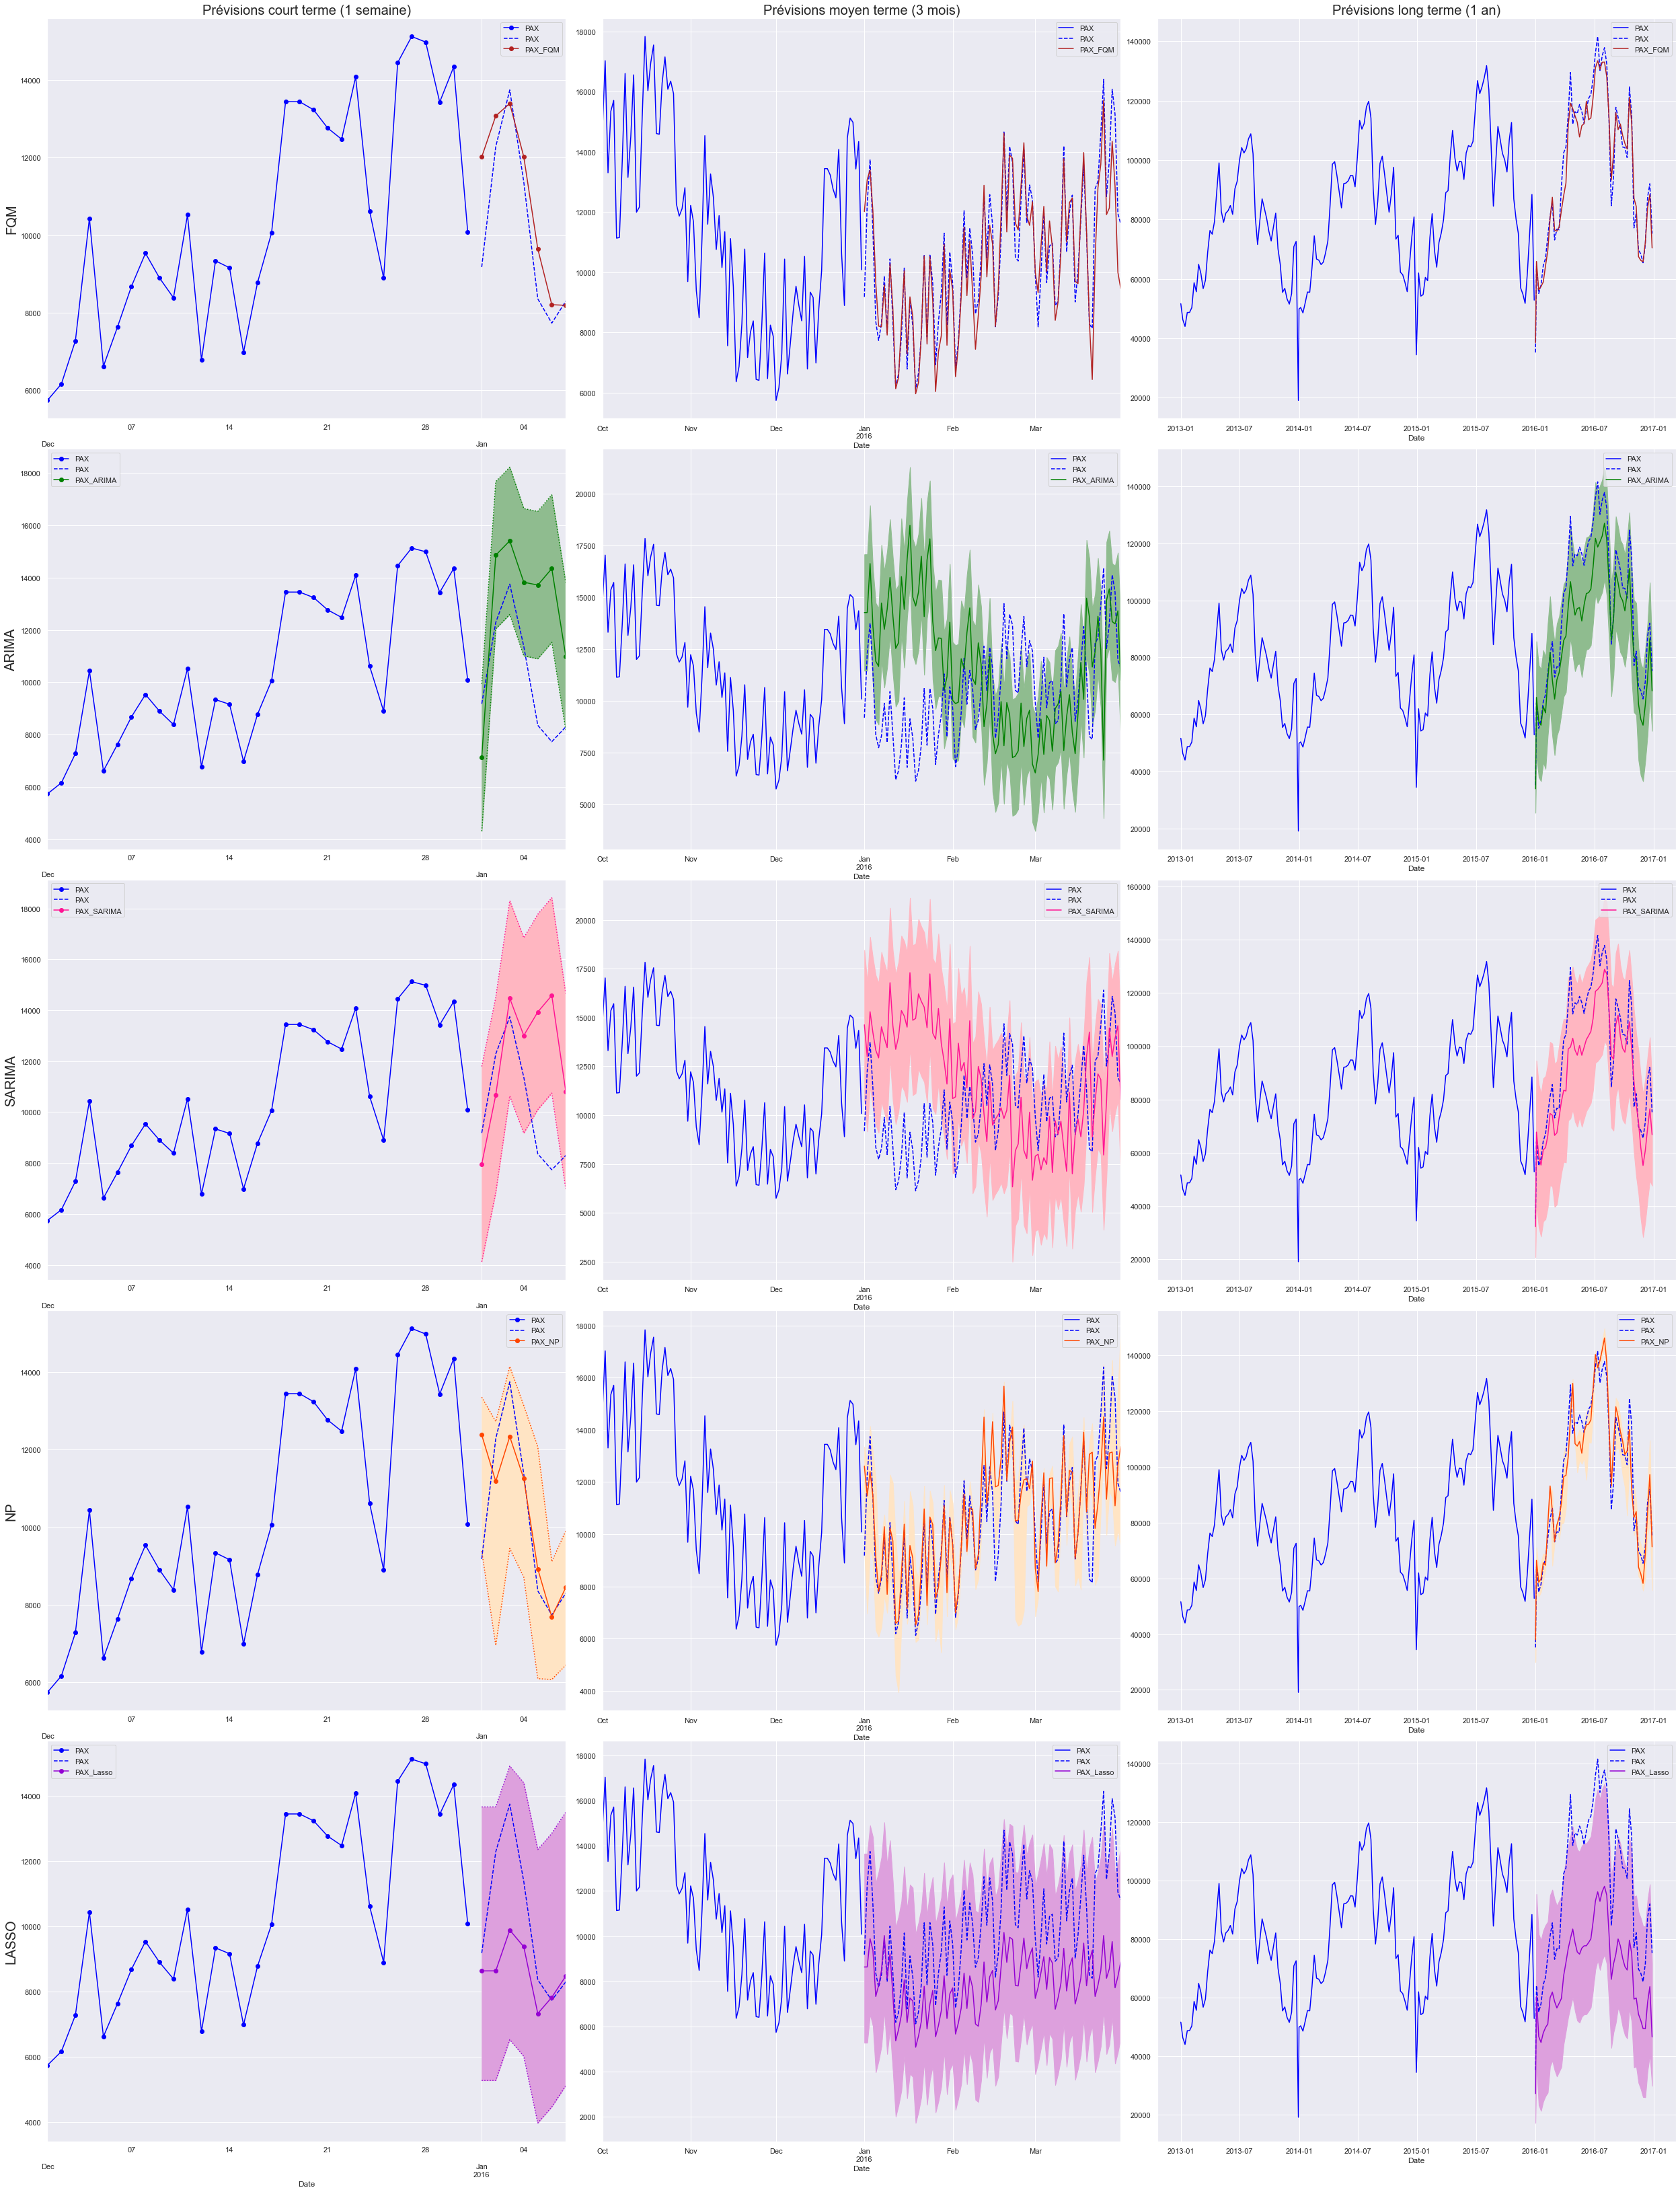

In [58]:
sns.set(style='darkgrid')

plt.rcParams.update({'font.size': 20})

cols = ["Prévisions court terme (1 semaine)", "Prévisions moyen terme (3 mois)","Prévisions long terme (1 an)"]

fig, ax = plt.subplots(5,3, figsize=(35,45))

for axi, col in zip(ax[0], cols):
    axi.set_title(col,fontsize=20)

for axi, row in zip(ax[:,0], modele):
    axi.set_ylabel(row, rotation=90,fontsize=20)

fig.tight_layout()


modele = ['FQM','ARIMA','SARIMA','NP','Lasso']
color = ['firebrick','green','deeppink','orangered','darkviolet']
color_ic = ['red','darkseagreen','lightpink','bisque','plum']


for i in range(5) :
    
    #Prev CT :
    
    histo_7j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='blue',style='o-')
    prev_7j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color='blue',style='--')
    prev_7j_dep_sch[['Date','PAX_'+modele[i]]].set_index('Date').plot(ax=ax[(i,0)],legend=True,subplots=True,color=color[i],style='o-')
    
    #Prev MT :
    
    histo_91j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='blue',style='-')
    prev_91j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color='blue',style='--')
    prev_91j_dep_sch[['Date','PAX_'+modele[i]]].set_index('Date').plot(ax=ax[(i,1)],legend=True,subplots=True,color=color[i],style='-')

    #Prev LT :
    
    histo_365j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='blue',style='-')
    prev_365j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color='blue',style='--')
    prev_365j_dep_sch[['Date','PAX_'+modele[i]]].set_index('Date').plot(ax=ax[(i,2)],legend=True,subplots=True,color=color[i],style='-')
    
    if i != 0 : # IC
        if i == 4 :
            modele[i] = 'LASSO'
        
        # IC CT :
        
        ax[(i,0)].fill_between(x=list(prev_7j_dep_sch['Date']), y1=list(prev_7j_dep_sch['IC95_up_'+modele[i]]), y2=list(prev_7j_dep_sch['IC95_low_'+modele[i]]), color=color_ic[i], label='IC à 95%')

        prev_7j_dep_sch[['Date','IC95_up_'+modele[i]]].set_index('Date').plot(ax=ax[(i,0)],legend=False,subplots=True,color=color[i],style=':')
        prev_7j_dep_sch[['Date','IC95_low_'+modele[i]]].set_index('Date').plot(ax=ax[(i,0)],legend=False,subplots=True,color=color[i],style=':')
    
        # IC MT :

        ax[(i,1)].fill_between(x=list(prev_91j_dep_sch['Date']), y1=list(prev_91j_dep_sch['IC95_up_'+modele[i]]), y2=list(prev_91j_dep_sch['IC95_low_'+modele[i]]), color=color_ic[i], label='IC à 95%')
    
        # IC LT :

        ax[(i,2)].fill_between(x=list(prev_365j_dep_sch['Date']), y1=list(prev_365j_dep_sch['IC95_up_'+modele[i]]), y2=list(prev_365j_dep_sch['IC95_low_'+modele[i]]), color=color_ic[i], label='IC à 95%')

#fig.savefig('previsions_schengen.png')

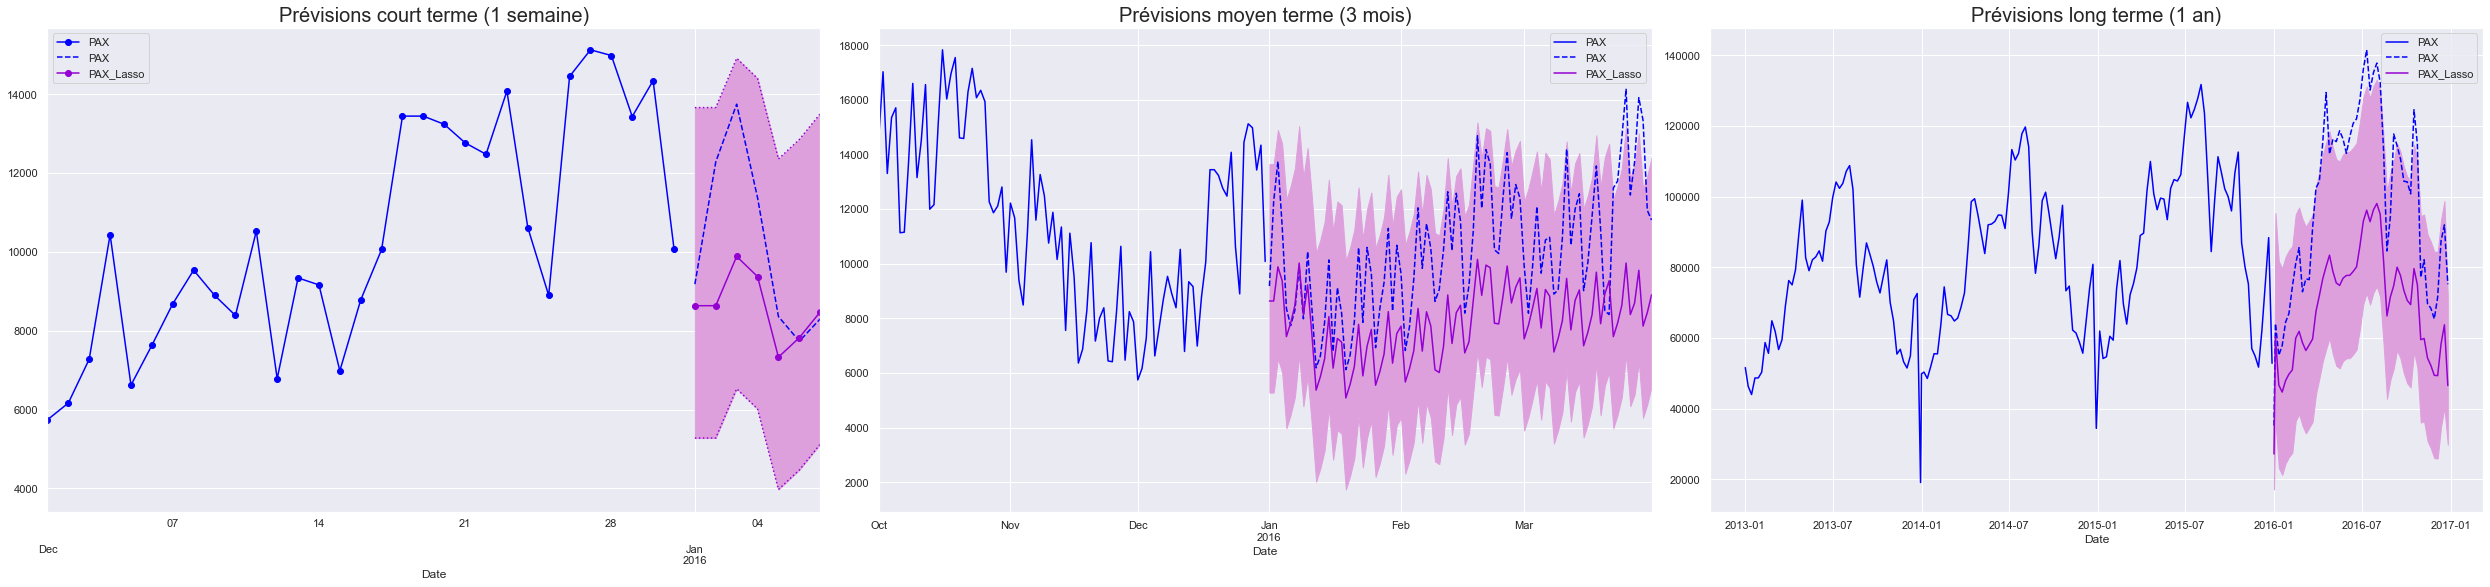

In [57]:
sns.set(style='darkgrid')

plt.rcParams.update({'font.size': 24})

cols = ["Prévisions court terme (1 semaine)", "Prévisions moyen terme (3 mois)","Prévisions long terme (1 an)"]

fig, ax = plt.subplots(1,3, figsize=(35,8))

for axi, col in zip(ax, cols):
    axi.set_title(col,fontsize=20)

fig.tight_layout()

i = 4

modele = ['FQM','ARIMA','SARIMA','NP','Lasso']
color = ['firebrick','green','deeppink','orangered','darkviolet']
color_ic = ['red','darkseagreen','lightpink','bisque','plum']

if True :

    #Prev CT :
    
    histo_7j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[0],legend=True,subplots=True,color='blue',style='o-')
    prev_7j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[0],legend=True,subplots=True,color='blue',style='--')
    prev_7j_dep_sch[['Date','PAX_'+modele[i]]].set_index('Date').plot(ax=ax[0],legend=True,subplots=True,color=color[i],style='o-')
    
    #Prev MT :
    
    histo_91j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[1],legend=True,subplots=True,color='blue',style='-')
    prev_91j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[1],legend=True,subplots=True,color='blue',style='--')
    prev_91j_dep_sch[['Date','PAX_'+modele[i]]].set_index('Date').plot(ax=ax[1],legend=True,subplots=True,color=color[i],style='-')

    #Prev LT :
    
    histo_365j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[2],legend=True,subplots=True,color='blue',style='-')
    prev_365j_dep_sch[['Date','PAX']].set_index('Date').plot(ax=ax[2],legend=True,subplots=True,color='blue',style='--')
    prev_365j_dep_sch[['Date','PAX_'+modele[i]]].set_index('Date').plot(ax=ax[2],legend=True,subplots=True,color=color[i],style='-')
    
    if i != 0 : # IC
        if i == 4 :
            modele[i] = 'LASSO'
        
        # IC CT :
        
        ax[0].fill_between(x=list(prev_7j_dep_sch['Date']), y1=list(prev_7j_dep_sch['IC95_up_'+modele[i]]), y2=list(prev_7j_dep_sch['IC95_low_'+modele[i]]), color=color_ic[i], label='IC à 95%')

        prev_7j_dep_sch[['Date','IC95_up_'+modele[i]]].set_index('Date').plot(ax=ax[0],legend=False,subplots=True,color=color[i],style=':')
        prev_7j_dep_sch[['Date','IC95_low_'+modele[i]]].set_index('Date').plot(ax=ax[0],legend=False,subplots=True,color=color[i],style=':')
    
        # IC MT :

        ax[1].fill_between(x=list(prev_91j_dep_sch['Date']), y1=list(prev_91j_dep_sch['IC95_up_'+modele[i]]), y2=list(prev_91j_dep_sch['IC95_low_'+modele[i]]), color=color_ic[i], label='IC à 95%')
    
        # IC LT :

        ax[2].fill_between(x=list(prev_365j_dep_sch['Date']), y1=list(prev_365j_dep_sch['IC95_up_'+modele[i]]), y2=list(prev_365j_dep_sch['IC95_low_'+modele[i]]), color=color_ic[i], label='IC à 95%')

#fig.savefig('prev_schengen'+str(modele[i])+'.png')